# Bevezetés

### Julia programozási nyelv

A Julia egy open-source (OS), JIT fordított, elsősorban nagy számításigényű feladatok gyors prototipizálására és nagy teljesítményű futtatására.

**Tulajdonságai:**
- Típusos (multiple dispatch)
- Just In Time Compiled
    - Nem szükséges külön fordítani (mint a pl a *C++*-t), elég csak beírni a parancsot, és már futtatható is a kód
    - Az első alkalommal futtatott függvények gépi kódra kerül for
    - Alkalmas teszi számítások gyors-prototipizálására, majd gyors futtatására
    - Cserébe az első futtatások lassúak
    - C-hez hasonló számítási teljesítmény érhető el (!!!)
- Open-source:
    - Ingyenes
    - Folyamatosan karban tartott és fejlesztett (2018. augusztusban jött ki az 1.0, most 1.1-nél tart)
    - Még adaptálási időszakban van, de egyre elterjedtebben alkalmazott az akadémiai szférában és ipari szereplők is kezdik használni/vizsgálni a használatát (Bosch)
    - Egyre növekvő "Community", sok segédlettel, fórummal (pl.: [discourse](https://discourse.julialang.org/)) 
- Moduláris:
    - Rengetek feladatra létezik "*package*" 
    - Csak azt kell behívni, amire szükségünk van
    - Ismerni kell a *package* ekoszisztémát, mik léteznek, mi mire jó, stb...
- Sok IDE (*Integrated Development Environment*) létezik:
    - Alapvetően shell (terminál) alapú
    - Notebook: **_jupyter notebook_**, *jupyter lab*
    - Szövegszerkesztő: [Juno (Atom + Julia)](https://juliacomputing.com/products/juliapro.html), - [Visual Studio Code](https://code.visualstudio.com/) [(+ Julia extension)](https://marketplace.visualstudio.com/items?itemName=julialang.language-julia))
    
### Jupyter notebook működése (+ Python kernel):

Legfontosabb tudnivalók:

- Csak egy *front-end*, ami kommunikál egy *kernel*-lel (ez a kernel menüben választható).
- Két mód létezik:
    - Command mode (cellaműveleteket lehet végezni)
    - Edit mode (szövegbevitel cellába)
- Command mode (`ESC` billentyű lenyomásával érhető el, kék csík a cella kijelölése esetén):
    - Notebook mentése: `s`
    - Cellák hozzáadása: `b` az aktuális cella alá, `a` az aktuális cella fölé
    - Cella törlése: kétszer egymás után a `d` billentyű lenyomása
    - Cella törlésének visszavonása: `z`
    - Cella másolás: `c`, kivágás: `x`, beillesztés az aktuális cella alá: `v`
    - Számozás bekapcsolása a cella soraira: `l` (kis L), vagy `Shift + l` az összes cellára
    - Cellamódok: futtatandó kód: `y`, nyers kód (nem futtatható): `r`, markdown (formázott szöveg): `m` 
- Edit mode (`Enter` billenytű lenyomásával érhető el, zöld szín):
    - Sor "kikommentelése"/"visszaállítása": `Ctrl + /`
    - Több kurzor lehelyezése: `Ctrl + Bal egérgomb` 
    - Téglalap-szerű kijelölés (rectangular selection): `Alt + Bal egérgomb` "húzása" (dragging)
- Közös
    - Cella futtatása, majd cellaléptetés: `Shift + Enter` (ez létrehoz egy új cellát, ha nincs hova lépnie)
    - Cella futtatása cellaléptetés nélkül: `Ctrl + Enter` 

**Jupyter notebook help-jének előhozása**: *Edit mode*-ban `h` lenyomásával  
**Julia help**: Kurzorral a függvény nevén állva `Shift + Tab` vagy egy cellába `?"fv_név"` beírása és futtatása

# Julia bevezető

## Stringek

In [1]:
String1 = "Ez egy string"
String2 = "és ez egy másik string"

"és ez egy másik string"

In [2]:
string(String1, ", ", String2)

"Ez egy string, és ez egy másik string"

In [3]:
🐱 = "Ez egy string egy macskafejben tárolva." # \:cat: + TAB
println("Ez mi? $🐱")

Ez mi? Ez egy string egy macskafejben tárolva.


Megjegyzés: A Julia megengedi a speciális karakterek használatát, a 😺 erre egy példa.  
[Speciális karakterek listája](https://docs.julialang.org/en/v1.1/manual/unicode-input/#Unicode-Input-1)

In [4]:
😺 = 1
😀 = 0
😞 = -1

😺 + 😞 == 😀

true

## Egyszerű és összetettebbk matematikai műveletek 

In [5]:
@show 17 + 7 #Összeadás
@show 333 - 7 #Kivonás
@show 11 * 22 #Szorzás
@show 7/9 #Osztás (ez nem egész (int) lesz: külön típus float)
@show 0.3-0.1-0.2 # float: számábrázolási hiba lehet!!
@show 2^3 # Hatványozás
@show sqrt(2) # Gyökvönás hatványozás segítségével
@show 5e-3 #normálalak e segítségével (vagy 5E-3)
;

17 + 7 = 24
333 - 7 = 326
11 * 22 = 242
7 / 9 = 0.7777777777777778
(0.3 - 0.1) - 0.2 = -2.7755575615628914e-17
2 ^ 3 = 8
sqrt(2) = 1.4142135623730951
0.005 = 0.005


In [6]:
String1 = "str_1";
String2 = "str_2";
@show String1*String2

String1 * String2 = "str_1str_2"


"str_1str_2"

In [7]:
Complex(0.,π)

0.0 + 3.141592653589793im

In [8]:
@show sin(2) #szinusz
@show acos(1)
@show exp(3)
@show exp(π*im)

@show Complex(1,2);

sin(2) = 0.9092974268256817
acos(1) = 0.0
exp(3) = 20.085536923187668
exp(π * im) = -1.0 + 1.2246467991473532e-16im
Complex(1, 2) = 1 + 2im


## Adatstruktúrák

### Tuple
immutable array (nem változtathatóak az elemek) - sorrendtartó

Syntax: <br>
```julia
(item1, item2, ...)```

In [9]:
myfavoriteanimals = ("penguins", "cats", "sugargliders")

("penguins", "cats", "sugargliders")

In [10]:
myfavoriteanimals[1]

"penguins"

In [11]:
myfavoriteanimals[1] = "lions"

MethodError: MethodError: no method matching setindex!(::Tuple{String,String,String}, ::String, ::Int64)

### Dictionary

Összetartozó adatokat lehet jól kezelni ezzel a struktúrával.

Syntax:
```julia
Dict(key1 => value1, key2 => value2, ...)```

Egy jó példa erra a telefonkönyv:

In [12]:
myphonebook = Dict("Scooby Doo" => "867-5309", "Ghostbusters" => "555-2368")

Dict{String,String} with 2 entries:
  "Scooby Doo"   => "867-5309"
  "Ghostbusters" => "555-2368"

In [13]:
myphonebook["Scooby Doo"]

"867-5309"

### Array

Tömbök, de ennek elemei változtathatóak (ellenben a Tuple-vel), sorrendtartó.

Syntax: <br>
```julia
[item1, item2, ...]```

Példák:

In [14]:
#String 
myfriends = ["Ted", "Robyn", "Barney", "Lily", "Marshall"]

5-element Array{String,1}:
 "Ted"     
 "Robyn"   
 "Barney"  
 "Lily"    
 "Marshall"

In [15]:
fibonacci = [1, 1, 2, 3, 5, 8, 13]

7-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13

In [16]:
mixture = [1, 1, 2, 3, "Ted", "Robyn"]

6-element Array{Any,1}:
 1       
 1       
 2       
 3       
  "Ted"  
  "Robyn"

We can also create arrays of other data structures, or multi-dimensional arrays.

In [17]:
numbers = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

3-element Array{Array{Int64,1},1}:
 [1, 2, 3]   
 [4, 5]      
 [6, 7, 8, 9]

In [18]:
rand(4, 3)

4×3 Array{Float64,2}:
 0.306641  0.518864  0.467643 
 0.422672  0.974896  0.65605  
 0.505299  0.785488  0.56353  
 0.68123   0.485266  0.0302433

## Ciklusok

### `for` ciklus

Syntax
```julia
for *var* in *loop iterable*
    *loop body*
end
```

In [19]:
for n in 1:10
    println(n)
end

1
2
3
4
5
6
7
8
9
10


### `while` ciklus

Syntax:
```julia
while *condition*
    *loop body*
end
```

In [20]:
n = 0
while n < 10
    n += 1
    println(n)
end

1
2
3
4
5
6
7
8
9
10


## Elágazások (Conditionals)

#### `if` elágazás

Syntax
```julia
if *condition 1*
    *option 1*
elseif *condition 2*
    *option 2*
else
    *option 3*
end
```

In [21]:
x, y = 3, 4 # Enter two numbers here!
if x > y
    x
else
    y
end

4

#### "Ternary operator"-oks

Syntax:
```julia
a ? b : c
```

Ami ugyanaz, mint:
```julia
if a
    b
else
    c
end
```

In [22]:
(x > y) ? x : y

4

## Függvények

### Deklaráció

In [23]:
function f(x)
    x^2
end

f (generic function with 1 method)

In [24]:
f2(x) = x^2

f2 (generic function with 1 method)

In [25]:
f3 = x -> x^2 # Anonim függvény / Lambda függvény

#3 (generic function with 1 method)

In [26]:
f(42)
f2(42)
f3(42)

1764

### Duck-typing in Julia
*"If it quacks like a duck, it's a duck."*

In [27]:
A = rand(3, 3)
A

3×3 Array{Float64,2}:
 0.0544915  0.0501387  0.670809
 0.979717   0.211192   0.507075
 0.984448   0.424972   0.657739

In [28]:
f(A)

3×3 Array{Float64,2}:
 0.712468  0.298396  0.503194
 0.759484  0.309217  1.09782 
 1.11751   0.41863   1.30849 

Másrészről `f` nem működik vektorokra: `v^2` forma vektorok esetén nem egyértelműen definiált. 

In [29]:
v = rand(3)

3-element Array{Float64,1}:
 0.7154783759182515 
 0.10681914131512737
 0.06750862533300706

In [30]:
f(v)

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

### Mutating vs. non-mutating functions

Konvenció: ha egy függvény neve mögött van egy `!`, akkor az a bemenetet megváltoztatja (mutate)

Pl. `sort` vs `sort!`

In [31]:
v = [3, 5, 2]

3-element Array{Int64,1}:
 3
 5
 2

In [32]:
sort(v)

3-element Array{Int64,1}:
 2
 3
 5

In [33]:
v

3-element Array{Int64,1}:
 3
 5
 2

In [34]:
sort!(v)

3-element Array{Int64,1}:
 2
 3
 5

In [35]:
v

3-element Array{Int64,1}:
 2
 3
 5

### Magasabb rendű függvények
#### map

`map` egy magasabb rendű függvény: az egyik bemenete egy függvény. 

Pl:
```julia
map(f, [1, 2, 3])
```
eredménye:
```julia
[f(1), f(2), f(3)]
```

In [36]:
map(f, [1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

In [37]:
map(x -> x^3, [1, 2, 3])

3-element Array{Int64,1}:
  1
  8
 27

### broadcast

A `broadcast` a `map` függvény általánosítása

In [38]:
broadcast(f, [1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

A `broadcast` rövidítése: `.` karakter segítségével
```julia
broadcast(f, [1, 2, 3])
```
ugyanaz, mint
```julia
f.([1, 2, 3])
```

In [39]:
f.([1, 2, 3])

3-element Array{Int64,1}:
 1
 4
 9

In [40]:
A = [i + 3*j for j in 0:2, i in 1:3]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [41]:
f(A)

3×3 Array{Int64,2}:
  30   36   42
  66   81   96
 102  126  150

In [42]:
B = f.(A)

3×3 Array{Int64,2}:
  1   4   9
 16  25  36
 49  64  81

A `.` szintaktika komplexebb műveletek egymásba fűzését is lehetővé teszik:

In [43]:
C = A .+ 2 .* f.(A) ./ A

3×3 Array{Float64,2}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

A hosszabb formája:

In [44]:
broadcast(x -> x + 2 * f(x) / x, A)

3×3 Array{Float64,2}:
  3.0   6.0   9.0
 12.0  15.0  18.0
 21.0  24.0  27.0

## Csomagok használata

Az elérhető csomagok listája elérhető:  
https://pkg.julialang.org/docs/  
https://juliaobserver.com/  

In [103]:
import Pkg
Pkg.add("Example")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [46]:
using Example

In [47]:
hello("World")

"Hello, World"

In [104]:
Pkg.add("Colors")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [49]:
using Colors

Let's create a palette of 100 different colors

In [50]:
palette = distinguishable_colors(20)

and then we can create a randomly checkered matrix using the `rand` command

In [51]:
rand(3, 3)

3×3 Array{Float64,2}:
 0.152328  0.571377   0.00645633
 0.507803  0.0654196  0.94989   
 0.74999   0.216275   0.263274  

In [52]:
rand(1:10, 3, 3)

3×3 Array{Int64,2}:
  6  7  9
  7  6  9
 10  1  5

In [53]:
rand(palette, 3, 3)

# Multiple dispatch

In [54]:
f(x) = x^2

f (generic function with 1 method)

In [55]:
f(10)

100

In [56]:
f([1, 2, 3])

MethodError: MethodError: no method matching ^(::Array{Int64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [57]:
foo(x::String, y::String) = println("My inputs x and y are both strings!")

foo (generic function with 1 method)

In [58]:
foo("hello", "hi!")

My inputs x and y are both strings!


In [59]:
foo(3, 4)

MethodError: MethodError: no method matching foo(::Int64, ::Int64)

In [60]:
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")

foo(3, 4)

My inputs x and y are both integers!


In [61]:
methods(foo)

# 2 methods for generic function "foo":
[1] foo(x::Int64, y::Int64) in Main at In[60]:1
[2] foo(x::String, y::String) in Main at In[57]:1

In [62]:
methods(hello)

# 1 method for generic function "hello":
[1] hello(who::String) in Example at /home/henrik/.julia/packages/Example/kH44X/src/Example.jl:4

In [102]:
methods(+);

In [64]:
@which foo(3, 4)

foo(x::Int64, y::Int64) in Main at In[60]:1

In [65]:
@which 3.0 + 3.0

+(x::Float64, y::Float64) in Base at float.jl:395

In [66]:
@code_native 3.0 + 3.0

	.text
; Function + {
; Location: float.jl:395
	vaddsd	%xmm1, %xmm0, %xmm0
	retq
	nopw	%cs:(%rax,%rax)
;}


# Struktúrák

## Típusok

In [67]:
xf=1.
xi=1
xf2=Float16(1);

In [68]:
xf-xf2

0.0

In [69]:
typeof(xf)

Float64

In [70]:
typeof(xf2)

Float16

In [71]:
typeof(xf) == typeof(xf2)

false

In [72]:
typeof(xf2) <: Real <:Number

true

## Kompozit típusok

Statikus elemekkel:
```julia
struct MyStruct{T}
  a::T
  b::Float64
  c # Paraméterezés nélkül nem ajánlott!
end```

Változtatható elemekkel (csak ha nagyon muszáj):
```julia
mutable struct MyStruct{T}
  a::T
  b::Float64
  c # Paraméterezés nélkül nem ajánlott!
end```

### Példa: Automatikus deriválás + "Duck typing"

In [73]:
struct D <: Number
  x::Float64
  d::Float64
end

D(x::Real) = D(x,1.);

In [74]:
import Base: +,-,*,/,abs,sin,cos,sqrt
import Base:promote_rule, convert, zero

+(d1::D,d2::D) = D(d1.x+d2.x,d1.d+d2.d)
-(d1::D,d2::D) = D(d1.x-d2.x,d1.d-d2.d)
*(d1::D,d2::D) = D(d1.x*d2.x,d1.d * d2.x + d1.x * d2.d)
/(d1::D,d2::D) = D(d1.x/d2.x, (d2.x*d1.d - d1.x*d2.d)/d2.x^2)
abs(d1::D) = D(abs(d1.x), d1.x > 0 ? d1.d : -d1.d)
sin(d1::D) = D(sin(d1.x),cos(d1.x)*d1.d)
cos(d1::D) = D(cos(d1.x),-sin(d1.x)*d1.d)
sqrt(d1::D) = D(sqrt(d1.x),d1.d/2sqrt(d1.x))

convert(::Type{D}, x::Real) = D(x,zero(x))
promote_rule(::Type{D}, ::Type{<:Number}) = D;
zero(::Type{D}) = D(0.,0.)
zero(::D) = zero(D)
D()=zero(D)


D

#### Mérési pontsorozatra illesztés

In [75]:
using Plots

In [76]:
datagen(t)=sin(2.1 + 2 * cos(3*t))

ts=0:0.1:10.;
its=0:0.01:10.;

data0=datagen.(ts)
data=data0 .+ 0.1*randn(length(ts));


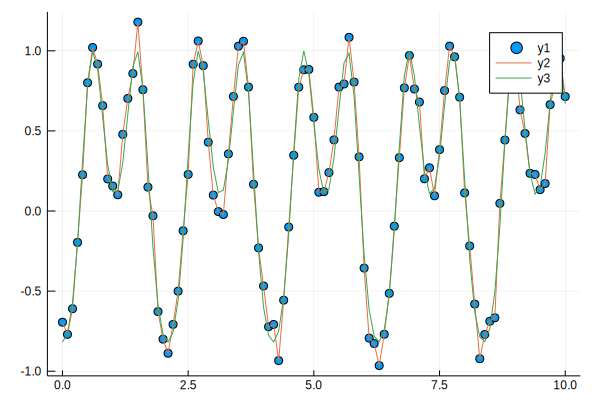

In [77]:
scatter(ts,data)
plot!(ts,data)
plot!(ts,data0)

In [78]:
using LsqFit

# model(t,p;k=3) = sum(p[i]*sin(i*t) + p[i+k]*cos(i*t) for i in 1:k) + p[end]
model(t::AbstractVector,p;k=3) = sum(p[i]*sin.(i*t) + p[i+k]*cos.(i*t) for i in 1:k) .+p[end]

modeld(t::AbstractVector,p;k=3) = sum(i*p[i]*cos.(i*t) - i*p[i+k]*sin.(i*t) for i in 1:k)

modeld (generic function with 1 method)

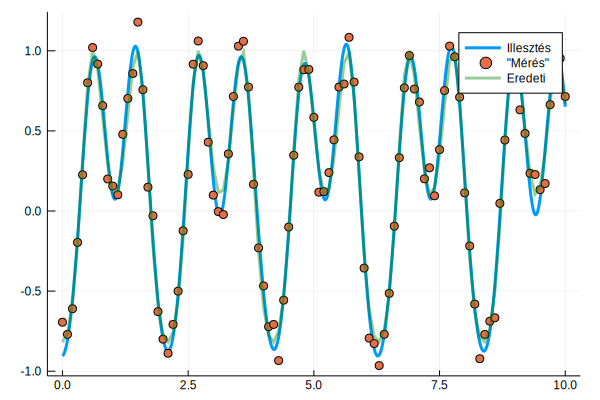

In [79]:
k=10
p0=rand(2k+1)
fit = curve_fit((t,p)->model(t,p,k=k), ts, data, p0);

plot(its,model(its,fit.param,k=k),linewidth=3,label="Illesztés",)
scatter!(ts,data,label="\"Mérés\"")
plot!(ts,data0,linewidth=3,color=:green,linealpha=0.4,label="Eredeti")

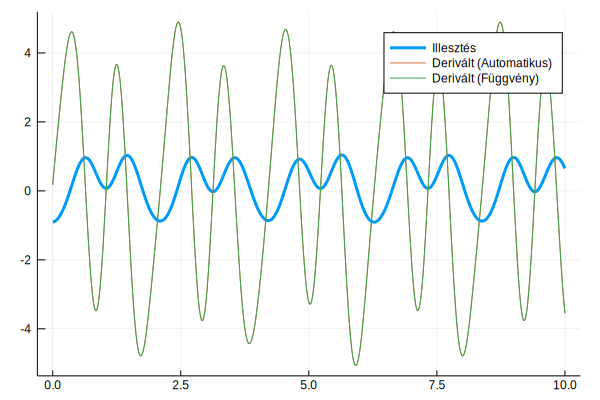

In [80]:
xd=model(D.(its),fit.param,k=k);

plot(its,getfield.(xd,:x),linewidth=3,label="Illesztés")
plot!(its,getfield.(xd,:d),linewidth=1,label="Derivált (Automatikus)")
plot!(its,modeld(its,fit.param,k=k),linewidth=1,label="Derivált (Függvény)")
# plot!(its,getfield.(datagen.(D.(its)),:d),linewidth=1,label="Derivált (Eredeti)")

In [81]:
sum(abs.(getfield.(xd,:d) .- modeld(its,fit.param,k=k)))

4.658030905435595e-12

In [82]:
# Sebesség koordináták segítségével
r(φ)=[cos(φ);sin(φ);0.]

@show  r(D(π/6,3.))

r(D(π / 6, 3.0)) = D[D(0.866025, -1.5), D(0.5, 2.59808), D(0.0, 0.0)]


3-element Array{D,1}:
 D(0.8660254037844387, -1.4999999999999998)
  D(0.49999999999999994, 2.598076211353316)
                                D(0.0, 0.0)

## Gyökszámítás közelítése iterációval

In [83]:
# Babylonian algorithm
function Babylonian(x; N = 10) 
    t = (1+x)/2
    for i = 2:N; t=(t + x/t)/2  end    
    t
end  

Babylonian (generic function with 1 method)

In [84]:
using BenchmarkTools

In [85]:
@show db=Babylonian(D(2))
@show db.d
@show 1/2sqrt(2);

db = Babylonian(D(2)) = D(1.414213562373095, 0.35355339059327373)
db.d = 0.35355339059327373
1 / (2 * sqrt(2)) = 0.35355339059327373


In [86]:
@btime Babylonian($2.0);

  37.550 ns (2 allocations: 32 bytes)


In [87]:
@btime Babylonian($D(2.));

  86.006 ns (0 allocations: 0 bytes)


In [88]:
@btime sqrt($2.0);

  2.173 ns (0 allocations: 0 bytes)


In [89]:
@btime sqrt($D(2))

  1.882 ns (0 allocations: 0 bytes)


D(1.4142135623730951, 0.35355339059327373)

## Két számmal való jelölés (Dual Number Notation)

Ahelyett, hogy `D(a,b)`-t ír ki a program, az `a + b ϵ` jelölést is lehet használni, ahol `ϵ^2 = 0`. (Analóg módon a komplex  számokhoz, ahol `i^2 = -1`, vagy értelmezhető úgy is, hogy a magasabb rendű `O(ϵ)` tagokat elhagyjuk)

A négy fő szabály (ezeket leprogramoztuk a definíció során)

$ (a+b\epsilon) \pm (c+d\epsilon) = (a \pm c) + (b \pm d)\epsilon$

$ (a+b\epsilon) * (c+d\epsilon) = (ac) + (bc+ad)\epsilon$

$ (a+b\epsilon) / (c+d\epsilon) = (a/c) + (bc-ad)/d^2 \epsilon $

In [90]:
Base.show(io::IO,x::D) = print(io,round(x.x,sigdigits=4),x.d < 0 ? " - " : " + ",round(abs(x.d),sigdigits=4)," ε")

In [91]:
r(D(π/6,3.))

3-element Array{D,1}:
 0.866 - 1.5 ε
 0.5 + 2.598 ε
   0.0 + 0.0 ε

**Rendes automatikus deriváláshoz a `ForwardDiff`/`ReverseDiff` csomag használata ajánlott!!!**

# Teljesítmény!

[Performance tips](https://docs.julialang.org/en/v1/manual/performance-tips/index.html)

In [92]:
x = rand(1000);

function sum_global()
   s = 0
   for i in x
       s += i
   end
   return s
end;

function sum_arg(x)
   s = 0
   for i in x
       s += i
   end
   return s
end;

function sum_argT(x::Vector{T}) where T
   s = zero(T)
   for i in x
       s += i
   end
   return s
end;

@time sum_global();
@time sum_arg(x);
@time sum_argT(x);

  0.008924 seconds (5.78 k allocations: 183.704 KiB)
  0.011778 seconds (15.22 k allocations: 792.786 KiB)
  0.007653 seconds (6.04 k allocations: 285.993 KiB)


In [93]:
x=rand(10000000);

@time s1 = sum_global();
@time s2 = sum_arg(x);
@time sum_argT(x);
s1==s2

  1.172507 seconds (40.00 M allocations: 762.932 MiB, 37.11% gc time)
  0.013436 seconds (6 allocations: 224 bytes)
  0.013393 seconds (5 allocations: 176 bytes)


true

In [94]:
# @code_warntype sum_arg(x)
# @code_warntype sum_argT(x)

In [95]:
@code_lowered sum_argT(x)

CodeInfo(
│20 1 ─       s = (Main.zero)($(Expr(:static_parameter, 1)))
│21 │   %2  = x
│   │         #temp# = (Base.iterate)(%2)
│   │   %4  = #temp# === nothing
│   │   %5  = (Base.not_int)(%4)
│   └──       goto #4 if not %5
│   2 ┄ %7  = #temp#
│   │         i = (Core.getfield)(%7, 1)
│   │   %9  = (Core.getfield)(%7, 2)
│22 │         s = s + i
│   │         #temp# = (Base.iterate)(%2, %9)
│   │   %12 = #temp# === nothing
│   │   %13 = (Base.not_int)(%12)
│   └──       goto #4 if not %13
│   3 ─       goto #2
│24 4 ─       return s
)

In [96]:
function foo(x::Vector{T}) where T
    n=10000
    newx=Vector{T}(undef,n)
    for i in 1:n
      newx[i] = 2*x[i].^3 + sin.(x[i])
    end
end
function foo_prealloc(x::Vector{T}) where T
    n=10000
    newx=[similar(x[1]) for i in 1:n]
    for i = 1:n
        newx[i] .=  2*x[i].^3 .+ sin.(x[i])
    end
    return newx
end


foo_prealloc (generic function with 1 method)

In [97]:
myx=[rand(100) for i in 1:10000];
@time foo(myx);
@time foo_prealloc(myx);

  0.220520 seconds (623.05 k allocations: 63.454 MiB, 11.02% gc time)
  0.129165 seconds (354.32 k allocations: 41.532 MiB, 8.91% gc time)


In [98]:
struct MyAmbiguousType
     a
end
struct MyStillAmbiguousType
   a::AbstractFloat
end
struct MyType{T<:AbstractFloat}
   a::T
end

In [99]:
function bar(mt)
  sin(2.1 + 2 * cos(3*mt.a))
end

bar (generic function with 1 method)

In [100]:
testa1=MyAmbiguousType.(rand(10000));
testa2=MyStillAmbiguousType.(rand(10000));
testa3=MyType.(rand(10000));

@time bar.(testa1);
@time bar.(testa2);
@time bar.(testa3);

  0.076964 seconds (231.82 k allocations: 9.947 MiB)
  0.084236 seconds (232.17 k allocations: 9.947 MiB, 10.25% gc time)
  0.056704 seconds (207.80 k allocations: 10.738 MiB)


In [101]:
@code_warntype bar(testa1[1])
println("----------------------")
@code_warntype bar(testa2[1])
println("----------------------")
@code_warntype bar(testa3[1])

Body::Any
│╻ getproperty2 1 ─ %1 = (Base.getfield)(mt, :a)::Any
│   │   %2 = (3 * %1)::Any
│   │   %3 = (Main.cos)(%2)::Any
│   │   %4 = (2 * %3)::Any
│   │   %5 = (2.1 + %4)::Any
│   │   %6 = (Main.sin)(%5)::Any
│   └──      return %6
----------------------
Body::Any
│╻ getproperty2 1 ─ %1  = (Base.getfield)(mt, :a)::AbstractFloat
│   │   %2  = (isa)(%1, BigFloat)::Bool
│   └──       goto #3 if not %2
│   2 ─ %4  = π (%1, BigFloat)
│╻ *  │   %5  = invoke Base.MPFR.:*(%4::BigFloat, 3::Int64)::BigFloat
│   └──       goto #4
│   3 ─ %7  = (3 * %1)::Any
│   └──       goto #4
│   4 ┄ %9  = φ (#2 => %5, #3 => %7)::Any
│   │   %10 = (Main.cos)(%9)::Any
│   │   %11 = (2 * %10)::Any
│   │   %12 = (2.1 + %11)::Any
│   │   %13 = (Main.sin)(%12)::Any
│   └──       return %13
----------------------
Body::Float64
│╻  getproperty2 1 ─ %1 = (Base.getfield)(mt, :a)::Float64
││╻  *  │   %2 = (Base.mul_float)(3.0, %1)::Float64
│    │   %3 = invoke Main.cos(%2::Float64)::Float64
││╻  *  │   %4 = (Base.mu